In [343]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c, pi

#defining the revised Sellmeier equation for KDP

def n(mat,l): #wavelengths to be input in microns, not metres
    A = mat[0]; B = mat[1]; C = mat[2]; D = mat[3]; E = mat[4]
    a = A + (B/((l**2) - C)) + (D*((l**2)/((l**2) - E)))
    return np.sqrt(a) #Sellmeier formula

#defining the Sellmeier constants for KDP  crystal

KDP_o = [2.2576,0.0101,0.0142,1.7623,57.8984]
KDP_e = [2.1295,0.0097,0.0014,0.7580,127.0535]

l_r = 0.694 #Ruby laser wavelength in microns
w = ((2*pi*c)/l_r)*1e06 #Ang. Freq. in rad/sec
z = 0.001 #crystal thickness in metres

n_ow = n(KDP_o,l_r) #1.5047897512867332
n_ew = n(KDP_e,l_r) #1.4651941941624484
n_o2w = n(KDP_o,0.5*l_r) #1.5326208199185622
n_e2w = n(KDP_e,0.5*l_r) #1.4866793632827024

#Defining the formulae for KDP specifically (all angles are in degrees)

def N_ang(x): #formula for n_e(\theta)
    return 1/(np.sqrt((((np.sin(x*pi/180))/n_e2w)**2)+(((np.cos(x*pi/180))/n_o2w)**2)))

def Eta(x): #formula for efficiency
    dn = N_ang(x) - n_ow
    dk = (2*w*dn)/c
    return ((np.sin((dk*z)/2))/((dk*z)/2))**2
    
def walkoff(x,h=0.001): #formula for walk-off angle
    u = -(N_ang(x+h) - N_ang(x))/(h*N_ang(x))*(180/pi) #value in degrees
    return  np.arctan(u)*(180/pi)

50.4883000000826


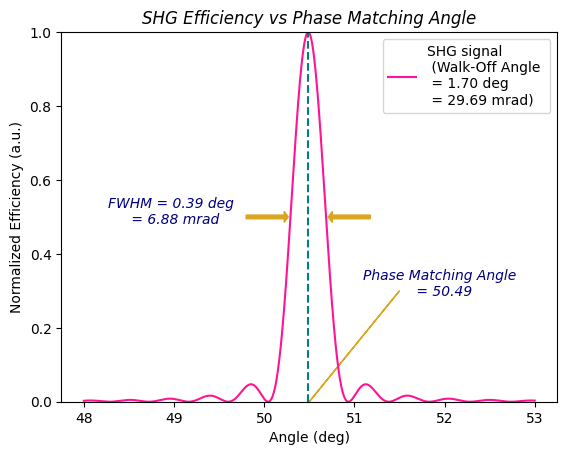

In [344]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


X = np.arange(48,53,0.0001)
Y = Eta(X)

PMA = X[np.argmax(Y)] #this is the phase-matching angle (degrees)
HM = 0.5*Y[np.argmax(Y)]
half_values = np.where(Y>=HM)[0]
FWHM = X[half_values[-1]] - X[half_values[0]] #this is the FWHM (degrees)

plt.plot(X,Y,color='deeppink',label='SHG signal \n (Walk-Off Angle \n = 1.70 deg \n = 29.69 mrad)')
plt.ylim(0, 1)
plt.xlabel('Angle (deg)')
plt.ylabel('Normalized Efficiency (a.u.)')
plt.title('SHG Efficiency vs Phase Matching Angle', fontstyle = 'italic')

plt.arrow(49.8,HM,X[half_values[0]] - 49.87,0,width = 0.01,color='goldenrod')
plt.arrow(X[half_values[-1]] + X[half_values[0]] - 49.8,HM,49.87-X[half_values[0]],0,width = 0.01,color='goldenrod')
plt.arrow(51.5,0.3,-1,-0.3, color = 'goldenrod')

plt.axvline(x = PMA, ymin=0, ymax=1, color = 'teal',linestyle='dashed')

fig = plt.gcf()
fig.text(0.3, 0.48, 'FWHM = ' + str(round(FWHM,2)) + ' deg \n = ' + str(round((FWHM*pi)/0.18,2)) + ' mrad', ha='center',fontstyle = 'italic',color = 'navy')
fig.text(0.72,0.33,'Phase Matching Angle \n = ' + str(round(PMA,2)), ha='center',fontstyle = 'italic',color = 'navy')

plt.legend()

print(PMA)

plt.show()





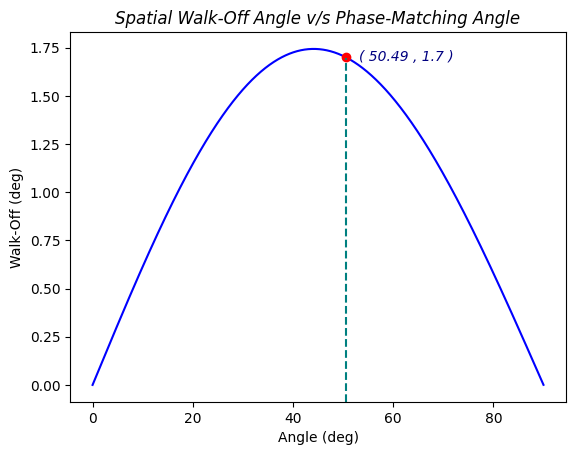

In [345]:
X1 = np.arange(0,90,0.01)
Y1 = walkoff(X1)

W_opt = walkoff(PMA) # walk-off angle at optimum phase-matching condition

plt.plot(X1,Y1,color='b')
plt.plot(PMA,W_opt,marker='o',color='r')
plt.xlabel('Angle (deg)')
plt.ylabel('Walk-Off (deg)')
plt.title('Spatial Walk-Off Angle v/s Phase-Matching Angle',fontstyle = 'italic')

fig = plt.gcf()
fig.text(0.65,0.82,'( ' + str(round(PMA,2)) + ' , ' + str(round(W_opt,2)) + ' )', ha='center',fontstyle = 'italic',color = 'navy')

plt.axvline(x = PMA, ymin=0, ymax=0.93, color = 'teal',linestyle='dashed')


plt.show()